# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sn
from datetime import datetime

%matplotlib inline
pd.set_option("display.max_columns", None)
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv('C:\\Users\\jltsa\\Desktop\\Cust_complaints\\Data\\complaint_full_data.csv')

Complaints are filed by consumers here: https://www.consumerfinance.gov/complaint/getting-started/.  Other than the dates, 'Comaplaint ID', and 'Consumer complaint narrative', the other features of the data are categorical.

In [7]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,05/14/2019,Debt collection,Other debt,Written notification about debt,Didn't receive notice of right to dispute,NaN,Company believes it acted appropriately as aut...,"Ideal Collection Services, Inc.",GA,31601,NaN,Consent not provided,Web,05/14/2019,Closed with explanation,Yes,NaN,3241328
1,05/14/2019,Checking or savings account,Other banking product or service,Incorrect information on your report,Information belongs to someone else,NaN,NaN,NAVY FEDERAL CREDIT UNION,TX,75089,NaN,NaN,Referral,05/14/2019,In progress,Yes,NaN,3242313
2,05/14/2019,Mortgage,Other type of mortgage,Trouble during payment process,NaN,NaN,NaN,"FLAGSTAR BANK, FSB",CA,923XX,Servicemember,NaN,Web,05/14/2019,In progress,Yes,NaN,3241344
3,05/14/2019,Debt collection,Payday loan debt,False statements or representation,"Impersonated attorney, law enforcement, or gov...",NaN,NaN,Red Cedar Associates LLC,OH,442XX,NaN,NaN,Web,05/14/2019,Closed with explanation,Yes,NaN,3242210
4,05/14/2019,Debt collection,Medical debt,Attempts to collect debt not owed,Debt is not yours,NaN,NaN,"CMRE Financial Services, Inc.",CA,95827,NaN,NaN,Phone,05/14/2019,Closed with explanation,Yes,NaN,3242512


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284185 entries, 0 to 1284184
Data columns (total 18 columns):
Date received                   1284185 non-null object
Product                         1284185 non-null object
Sub-product                     1049019 non-null object
Issue                           1284185 non-null object
Sub-issue                       752760 non-null object
Consumer complaint narrative    383840 non-null object
Company public response         449986 non-null object
Company                         1284185 non-null object
State                           1264704 non-null object
ZIP code                        1168619 non-null object
Tags                            175903 non-null object
Consumer consent provided?      691594 non-null object
Submitted via                   1284185 non-null object
Date sent to company            1284184 non-null object
Company response to consumer    1284178 non-null object
Timely response?                1284185 non-null obj

## Explore Features of the Complaints Data

### Date Received

As of 5/21/19 the dates range from 12/01/2011 to 5/14/19.

In [3]:
#convert column to date
def convert_to_dt(row):
    date_format = '%m/%d/%Y'
    val = datetime.strptime(row['Date received'], date_format)
    return val

In [4]:
df['Date received'] = df.apply(convert_to_dt, axis=1)

In [48]:
#Rows organized by year
df_by_year = df.resample('Y', on='Date received').count()
df_by_year

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
Date received,,,,,,,,,,,,,,,,,,
2011-12-31,2536,2536,1276,2536,0,0,0,2536,2521,2521,380,0,2536,2536,2536,2536,2536,2536
2012-12-31,72373,72373,55147,72373,1883,0,2,72373,71758,71758,7301,0,72373,72373,72373,72373,72373,72373
2013-12-31,108218,108218,80539,108218,25574,0,9,108218,107165,107165,13940,0,108218,108218,108218,108218,108218,108218
2014-12-31,153047,153047,108128,153047,72653,0,133,153047,152046,152042,22565,0,153047,153047,153047,153047,153047,153047
2015-12-31,168487,168487,115330,168487,78509,54758,61700,168487,167343,153474,25927,99671,168487,168487,168487,168487,168487,168487
2016-12-31,191473,191473,124761,191473,92637,77823,99617,191473,190146,170837,28313,140668,191473,191473,191473,191473,191473,191473
2017-12-31,242975,242975,218762,242975,184251,115172,116776,242975,238995,212402,32286,197914,242975,242975,242974,242975,72367,242975
2018-12-31,257380,257380,257380,257380,220914,118479,129710,257380,249882,223234,32716,208939,257380,257380,257375,257380,0,257380
2019-12-31,87696,87696,87696,87696,76339,17608,42039,87696,84848,75186,12475,44402,87696,87695,87695,87696,0,87696


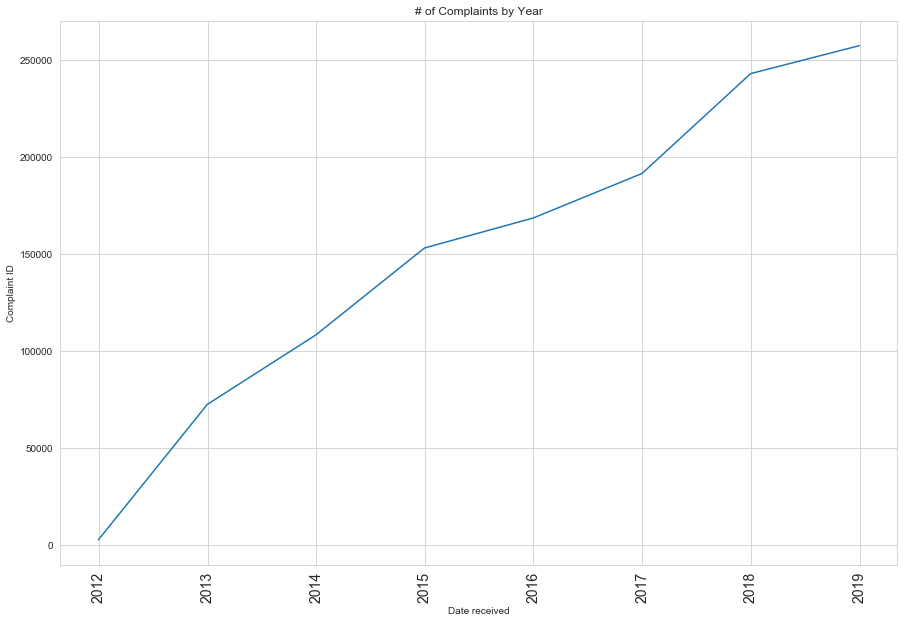

In [55]:
sn.set_style("whitegrid")
plt.figure(figsize=(15, 10))
plt.rc('xtick', labelsize=14)
plt.xticks(rotation=90)
plt.title('# of Complaints by Year')
sn.lineplot(df_by_year.index[:-1], df_by_year['Complaint ID'][:-1])

In [74]:
start_year = df_by_year['Complaint ID'][0]
next_year = 0
vals = []

for count in df_by_year['Complaint ID'][1:]:
    next_year = count
    change = next_year/start_year * 100
    vals.append(change)
    start_year = next_year
    
print(f'From 2013 to 2014 the complaints submitted to the CFPB increased by {vals[1]:.2f}%')
print(f'From 2014 to 2015 the complaints submitted to the CFPB increased by {vals[2]:.2f}%')
print(f'From 2015 to 2016 the complaints submitted to the CFPB increased by {vals[3]:.2f}%')
print(f'From 2016 to 2017 the complaints submitted to the CFPB increased by {vals[4]:.2f}%')
print(f'From 2017 to 2018 the complaints submitted to the CFPB increased by {vals[5]:.2f}%')
print(f'From 2018 to 2019 the complaints submitted to the CFPB increased by {vals[6]:.2f}%')

From 2013 to 2014 the complaints submitted to the CFPB increased by 149.53%
From 2014 to 2015 the complaints submitted to the CFPB increased by 141.42%
From 2015 to 2016 the complaints submitted to the CFPB increased by 110.09%
From 2016 to 2017 the complaints submitted to the CFPB increased by 113.64%
From 2017 to 2018 the complaints submitted to the CFPB increased by 126.90%
From 2018 to 2019 the complaints submitted to the CFPB increased by 105.93%


The CPFB takes in complaints from consumers and sends the complaints to firm the complaint was filed against.  What we can infer from this is that the number of complaints has at least double each year.  This could be due to increased adoption of technology and the ease to report complaints.  Worse yet, we could also infer that customer service could be falling or that consumers are increasingly unhappy with their products.

### Products

In [8]:
df.Product.describe()

count      1284185
unique          18
top       Mortgage
freq        278249
Name: Product, dtype: object

In [13]:
df.Product.unique()

array(['Debt collection', 'Checking or savings account', 'Mortgage',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Money transfer, virtual currency, or money service',
       'Payday loan, title loan, or personal loan', 'Student loan',
       'Credit card or prepaid card', 'Vehicle loan or lease',
       'Credit card', 'Credit reporting', 'Bank account or service',
       'Payday loan', 'Consumer Loan', 'Other financial service',
       'Prepaid card', 'Money transfers', 'Virtual currency'],
      dtype=object)

In [11]:
pd.DataFrame(df.Product.unique())

,0
0,Debt collection
1,Checking or savings account
2,Mortgage
3,"Credit reporting, credit repair services, or o..."
4,"Money transfer, virtual currency, or money ser..."
5,"Payday loan, title loan, or personal loan"
6,Student loan
7,Credit card or prepaid card
8,Vehicle loan or lease
9,Credit card


There are 18 categories of products listed.

In [44]:
df_product_count = df.groupby('Product').count()['Complaint ID'].sort_values(ascending=False)
df_product_count

Product
Mortgage                                                                        278249
Debt collection                                                                 245218
Credit reporting, credit repair services, or other personal consumer reports    226781
Credit reporting                                                                140432
Credit card                                                                      89190
Bank account or service                                                          86206
Student loan                                                                     51742
Credit card or prepaid card                                                      47811
Checking or savings account                                                      40850
Consumer Loan                                                                    31605
Vehicle loan or lease                                                            11413
Money transfer, virtual currency, o

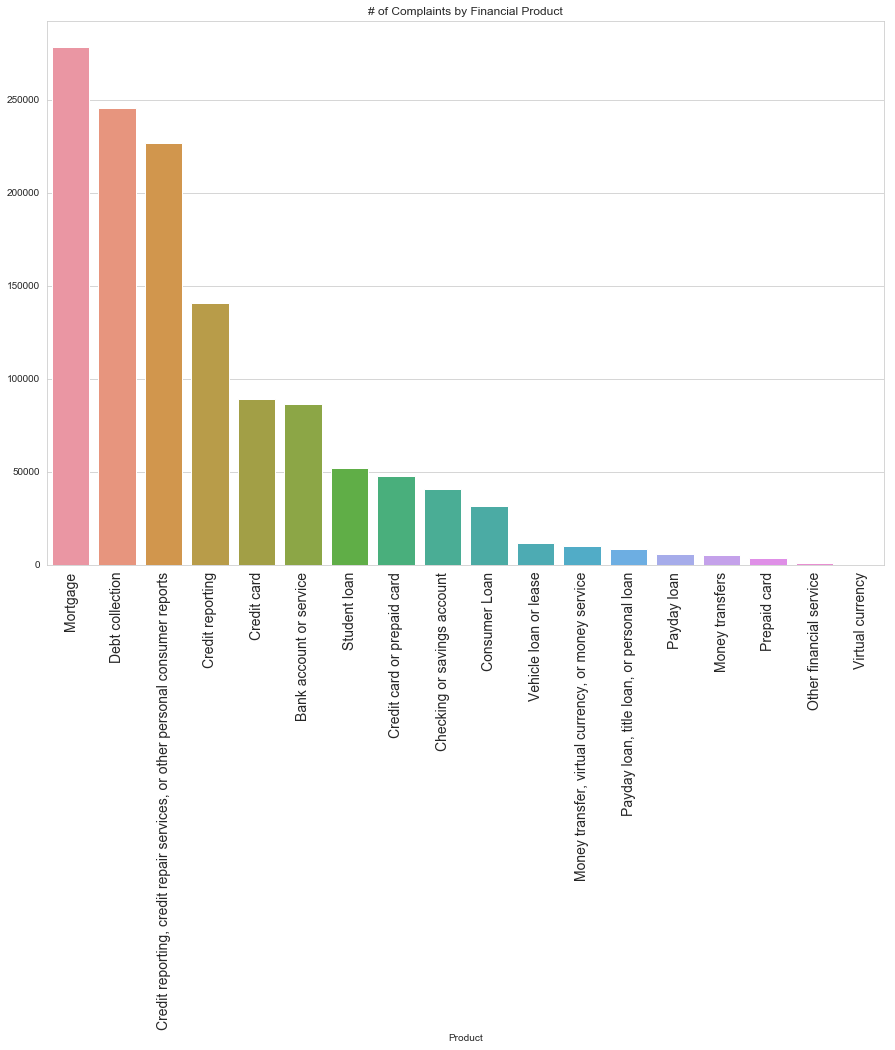

In [28]:
sn.set_style("whitegrid")
plt.figure(figsize=(15, 10))
plt.rc('xtick', labelsize=14)
plt.xticks(rotation=90)
plt.title('# of Complaints by Financial Product')
sn.barplot(df_product_count.index, df_product_count.values)

Most of the complaints come from products regarding mortgages, debt, and credit reporting.

In [110]:
#Total complaints for mortages, debt, and credit reporting products
percentage = (df_product_count[0]+df_product_count[1]+df_product_count[2]+df_product_count[3])/1284185
print(f'Mortages, debt, and credit reporting comprise {percentage:.2f}% of the total complaints.')

Mortages, debt, and credit reporting comprise 0.69% of the total complaints.


### Sub-Products

In [75]:
df['Sub-product'].describe()

count              1049019
unique                  76
top       Credit reporting
freq                222436
Name: Sub-product, dtype: object

In [81]:
pd.DataFrame(df['Sub-product'].unique())[:20]

,0
0,Other debt
1,Other banking product or service
2,Other type of mortgage
3,Payday loan debt
4,Medical debt
5,Credit reporting
6,I do not know
7,Savings account
8,Checking account
9,International money transfer


In [82]:
#Top 20 Sub-Product complaints
df_subproduct_count = df.groupby('Sub-product').count()['Complaint ID'].sort_values(ascending=False)
df_subproduct_count[:20]

Sub-product
Credit reporting                              222436
Checking account                               89532
Other mortgage                                 86636
Conventional fixed mortgage                    70613
I do not know                                  50149
Other (i.e. phone, health club, etc.)          44554
General-purpose credit card or charge card     37109
FHA mortgage                                   31669
Other debt                                     30576
Conventional home mortgage                     28832
Credit card                                    28698
Conventional adjustable mortgage (ARM)         25380
Non-federal student loan                       25165
Federal student loan servicing                 22444
Medical                                        21187
Credit card debt                               20286
Other bank product/service                     17825
Vehicle loan                                   17782
Medical debt                      

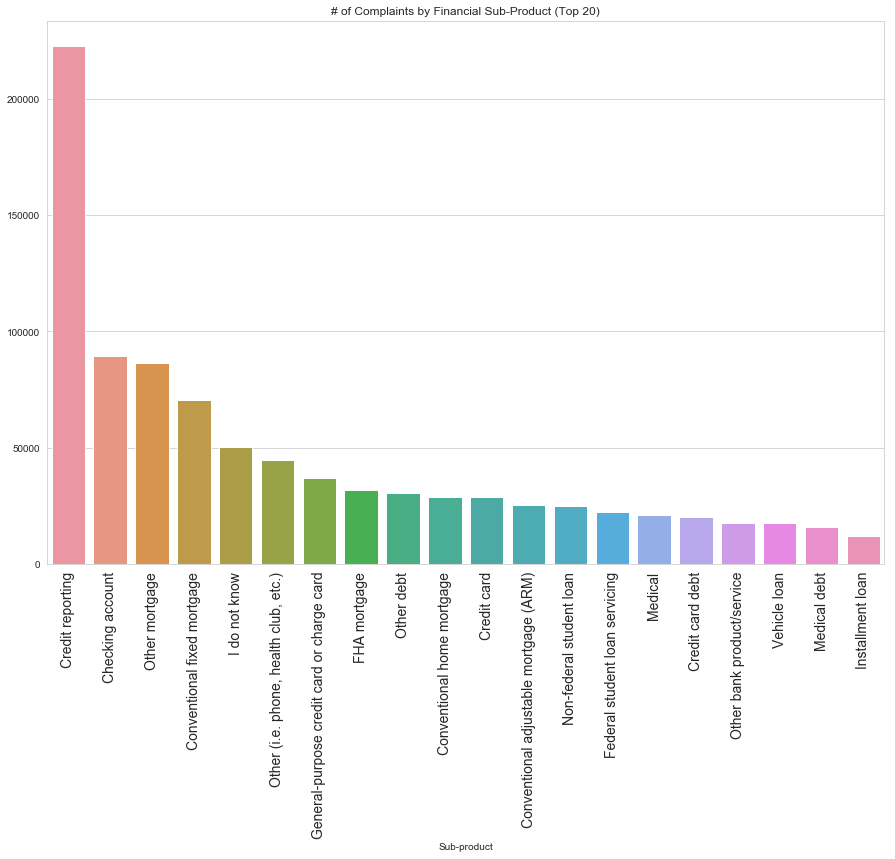

In [80]:
sn.set_style("whitegrid")
plt.figure(figsize=(15, 10))
plt.rc('xtick', labelsize=14)
plt.xticks(rotation=90)
plt.title('# of Complaints by Financial Sub-Product (Top 20)')
sn.barplot(df_subproduct_count.index[:20], df_subproduct_count.values[:20])

There are 76 categories of subproducts.  Other than credit related products (debt, loans, credit cards etc.), checking accounts stand out as the 2nd highest subproducts with complaints against it.

###  Issues

In [111]:
df['Issue'].describe()

count                                  1284185
unique                                     167
top       Incorrect information on your report
freq                                    134809
Name: Issue, dtype: object

In [112]:
df['Issue'].unique()

array(['Written notification about debt',
       'Incorrect information on your report',
       'Trouble during payment process',
       'False statements or representation',
       'Attempts to collect debt not owed', 'Managing an account',
       'Problem with a lender or other company charging your account',
       'Communication tactics', 'Other transaction problem',
       'Struggling to pay your loan',
       'Dealing with your lender or servicer',
       'Advertising and marketing, including promotional offers',
       'Getting a loan or lease',
       'Confusing or misleading advertising or marketing',
       'Improper use of your report', 'Opening an account',
       'Problem with the payoff process at the end of the loan',
       'Took or threatened to take negative or legal action',
       "Was approved for a loan, but didn't receive the money",
       'Threatened to contact someone or share information improperly',
       'Problems at the end of the loan or lease',
       "

In [115]:
#Top 20 issues
df_issue_count = df.groupby('Issue').count()['Complaint ID'].sort_values(ascending=False)
df_issue_count[:20]

Issue
Incorrect information on your report                                                134809
Loan modification,collection,foreclosure                                            112311
Incorrect information on credit report                                              102686
Loan servicing, payments, escrow account                                             77333
Cont'd attempts collect debt not owed                                                60687
Problem with a credit reporting company's investigation into an existing problem     51498
Attempts to collect debt not owed                                                    43181
Account opening, closing, or management                                              37961
Communication tactics                                                                35449
Improper use of your report                                                          33441
Disclosure verification of debt                                                     

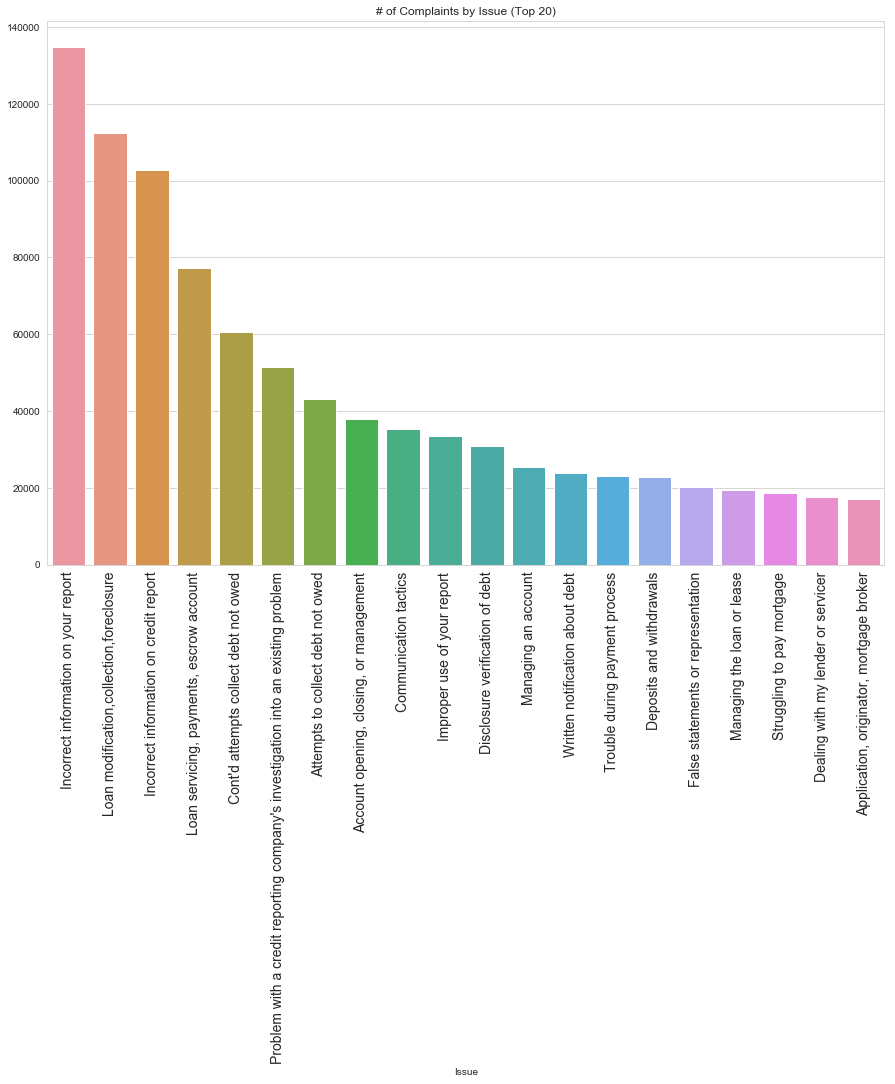

In [116]:
sn.set_style("whitegrid")
plt.figure(figsize=(15, 10))
plt.rc('xtick', labelsize=14)
plt.xticks(rotation=90)
plt.title('# of Complaints by Issue (Top 20)')
sn.barplot(df_issue_count.index[:20], df_issue_count.values[:20])

Many of these issues seem to stem from how consumer information is handled and reported.  Perhaps this is a red flag that employees need to be trained to handle consumer information with better care both in use and when entering in data.  From my experience working both at a bank and a mortgage lender, there are plenty of applications taken on a daily basis.  Much of the information entered is sensitive information like ID numbers, SSN's, DOB, etc.  Not properly communicating a product is also seen a lot in finance.  At least in retail, there is always the rush of getting the next client in and out of the seat as fast as possible.  After all, more sales means more commissions.

### Sub Issues

In [117]:
df['Sub-issue'].describe()

count                                  752760
unique                                    218
top       Information belongs to someone else
freq                                    59464
Name: Sub-issue, dtype: object

In [119]:
df_subissue_count = df.groupby('Sub-issue').count()['Complaint ID'].sort_values(ascending=False)

In [120]:
df_subissue_count[:20]

Sub-issue
Information belongs to someone else                                                 59464
Account status                                                                      37057
Their investigation did not fix an error on your report                             37028
Debt is not mine                                                                    36731
Information is not mine                                                             32384
Account status incorrect                                                            27090
Debt was paid                                                                       26029
Account information incorrect                                                       23907
Debt is not yours                                                                   23259
Not given enough info to verify debt                                                21814
Credit inquiries on your report that you don't recognize                            21443


There does not need to be a graph to see among the top 20 sub-issues that again the alot of the problems come from how consumer information is handled.  What needs to be done? This seems less of a question of customer service, and more 'How can firms better handle consumer information?'  Taking a little extra time or pre-cautionary steps could save tens of tousands of customers the pain of mishandling their information.

### Consumer Complaint Narrative
Skip over this for now, we will be using some NLP techniques for machine learning

### Company Public Response

In [123]:
df_response_count = df.groupby('Company public response').count()['Complaint ID'].sort_values(ascending=False)

In [126]:
pd.DataFrame(df_response_count)

,Complaint ID
Company public response,
Company has responded to the consumer and the CFPB and chooses not to provide a public response,312608
Company believes it acted appropriately as authorized by contract or law,61244
Company chooses not to provide a public response,52473
Company believes the complaint is the result of a misunderstanding,5685
Company disputes the facts presented in the complaint,5265
Company believes complaint caused principally by actions of third party outside the control or direction of the company,3996
Company believes complaint is the result of an isolated error,3734
Company believes complaint represents an opportunity for improvement to better serve consumers,2621
Company can't verify or dispute the facts in the complaint,2299


In [128]:
pd.DataFrame(df_response_count).sum()

Complaint ID    449986
dtype: int64

In [129]:
reponse = 449986/1284185
print(f'Out of 1,284,185 complaints submitted to the CFPB, {reponse:.2f}% of the time the financial firm has responded to the complaint in some way.')

Out of 1,284,185 complaints submitted to the CFPB, 0.35% of the time the financial firm has responded to the complaint in some way.


### Company

In [132]:
df['Company'].describe()

count           1284185
unique             5283
top       EQUIFAX, INC.
freq             115905
Name: Company, dtype: object

In [133]:
df_company_count = df.groupby('Company').count()['Complaint ID'].sort_values(ascending=False)

In [135]:
df_company_count[:20]

Company
EQUIFAX, INC.                             115905
Experian Information Solutions Inc.       104100
TRANSUNION INTERMEDIATE HOLDINGS, INC.     96720
BANK OF AMERICA, NATIONAL ASSOCIATION      82171
WELLS FARGO & COMPANY                      70989
JPMORGAN CHASE & CO.                       60285
CITIBANK, N.A.                             49096
CAPITAL ONE FINANCIAL CORPORATION          34626
Navient Solutions, LLC.                    29323
OCWEN LOAN SERVICING LLC                   27757
SYNCHRONY FINANCIAL                        21955
NATIONSTAR MORTGAGE                        20462
U.S. BANCORP                               17139
Ditech Financial LLC                       14110
AMERICAN EXPRESS COMPANY                   13763
PNC Bank N.A.                              11813
ENCORE CAPITAL GROUP INC.                  11428
PORTFOLIO RECOVERY ASSOCIATES INC          10379
DISCOVER BANK                              10341
TD BANK US HOLDING COMPANY                  9735
Name: Compla

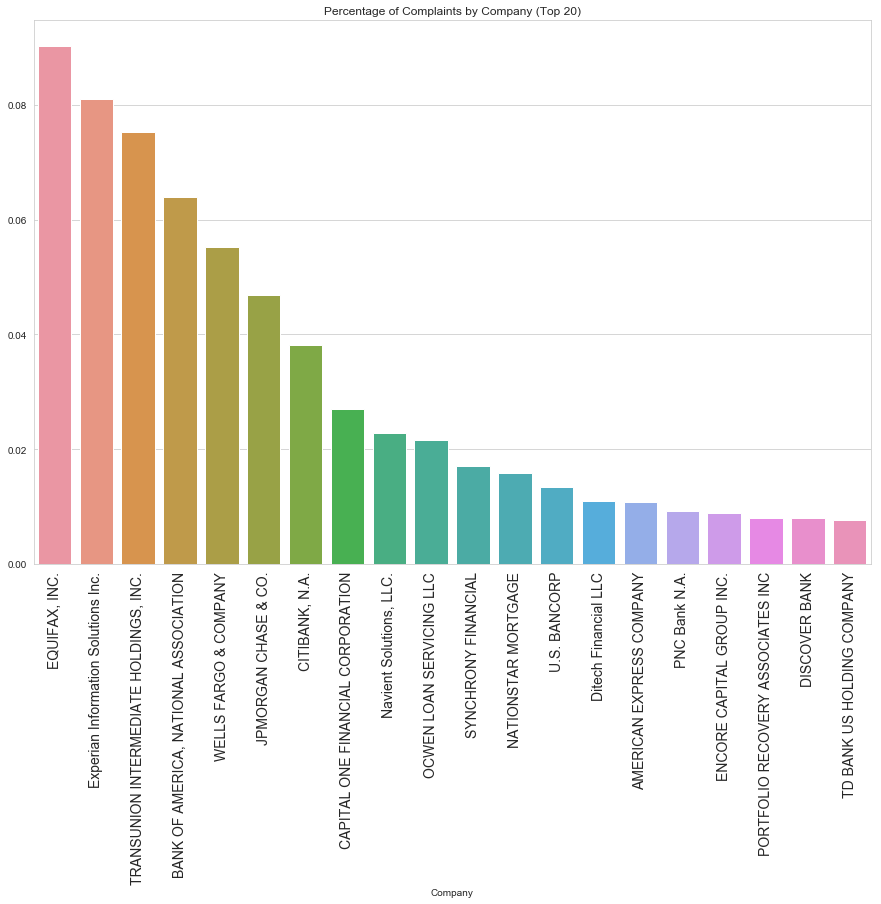

In [138]:
sn.set_style("whitegrid")
plt.figure(figsize=(15, 10))
plt.rc('xtick', labelsize=14)
plt.xticks(rotation=90)
plt.title('Percentage of Complaints by Company (Top 20)')
sn.barplot(df_company_count.index[:20], df_company_count.values[:20]/1284185)

As a past financial professional, the graph above is not surprising at all.  The biggest culprits are the credit reporting agencies and big banks.  With the larger firms, it does make sense that there would be more over all complaints due to the size of their customer base.  It is also harder to manage customer service and sales reps as a company becomes larger and the customer base increases.

### Timely Response

In [140]:
df['Timely response?'].describe()

count     1284185
unique          2
top           Yes
freq      1251987
Name: Timely response?, dtype: object

In [141]:
df_response_count = df.groupby('Timely response?').count()['Complaint ID'].sort_values(ascending=False)

In [142]:
df_response_count

Timely response?
Yes    1251987
No       32198
Name: Complaint ID, dtype: int64

In [145]:
un_timely = df_response_count['No']/(df_response_count['Yes'] + df_response_count['No']) * 100

In [146]:
print(f'{un_timely:.2f}% of complaints were not appropriately handled in time.')

2.51% of complaints were not appropriately handled in time.


That number seems pretty low, but just because a complaint was handled in a timely manner does not mean it was handled in the best way.  Also, 2.51% is reflected of complaints reported to the CPFB and is still around 32198 customers.

##  Analyzing the Data Further

Not all of the features were looked through above, but I think the ones listed were the more important features.  I will further analyze the data set below to find more interesting relationaships.

### Products with Timely Reponse

In [8]:
# Mortgage
df_product_count = df[df.Product == 'Mortgage'].groupby('Timely response?').count().sort_values(by='Complaint ID', ascending=False)
df_product_count.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Consumer disputed?,Complaint ID
Timely response?,,,,,,,,,,,,,,,,,
Yes,272721,272721,272721,272721,0,52116,69311,272721,269459,254939,39765,89018,272721,272721,272720,222101,272721
No,5528,5528,5528,5528,0,896,444,5528,5463,5221,763,1475,5528,5528,5528,4798,5528


In [26]:
# Debt Collcetion
df_product_count = df[df.Product == 'Debt collection'].groupby('Timely response?').count().sort_values(by='Complaint ID', ascending=False)
df_product_count

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Consumer disputed?,Complaint ID
Timely response?,,,,,,,,,,,,,,,,,
Yes,229972,229972,229972,229972,229972,80716,76503,229972,227448,207705,34242,143719,229972,229971,229970,135168,229972
No,15246,15246,15246,15246,15246,6053,2788,15246,15050,13578,2164,9960,15246,15246,15246,10667,15246


In [27]:
# Credit Reporting
df_product_count = df[df.Product == 'Credit reporting'].groupby('Timely response?').count().sort_values(by='Complaint ID', ascending=False)
df_product_count

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Consumer disputed?,Complaint ID
Timely response?,,,,,,,,,,,,,,,,,
Yes,140135,140135,0,140135,140135,31499,54518,140135,139664,132530,17361,69485,140135,140135,140135,140135,140135
No,297,297,0,297,297,89,90,297,295,271,35,181,297,297,297,297,297


In [28]:
# Credit reporting, credit repair services, or other personal consumer reports
df_product_count = df[df.Product == 'Credit reporting, credit repair services, or other personal consumer reports'].groupby('Timely response?').count().sort_values(by='Complaint ID', ascending=False)
df_product_count

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Consumer disputed?,Complaint ID
Timely response?,,,,,,,,,,,,,,,,,
Yes,223587,223587,223587,223587,217908,90989,128480,223587,220216,198706,26493,184520,223587,223587,223583,0,223587
No,3194,3194,3194,3194,3088,1522,429,3194,3166,2788,423,2642,3194,3194,3194,0,3194


In [29]:
# Credit card
df_product_count = df[df.Product == 'Credit card'].groupby('Timely response?').count().sort_values(by='Complaint ID', ascending=False)
df_product_count

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Consumer disputed?,Complaint ID
Timely response?,,,,,,,,,,,,,,,,,
Yes,88208,88208,0,88208,0,18655,20592,88208,87501,82702,13369,31673,88208,88208,88208,88208,88208
No,982,982,0,982,0,183,306,982,975,925,136,320,982,982,982,982,982


In [30]:
# Bank account or service
df_product_count = df[df.Product == 'Bank account or service'].groupby('Timely response?').count().sort_values(by='Complaint ID', ascending=False)
df_product_count

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Consumer disputed?,Complaint ID
Timely response?,,,,,,,,,,,,,,,,,
Yes,83980,83980,83980,83980,0,14264,23129,83980,82464,79132,11460,22995,83980,83980,83980,83980,83980
No,2226,2226,2226,2226,0,621,955,2226,2186,2043,365,1032,2226,2226,2226,2226,2226


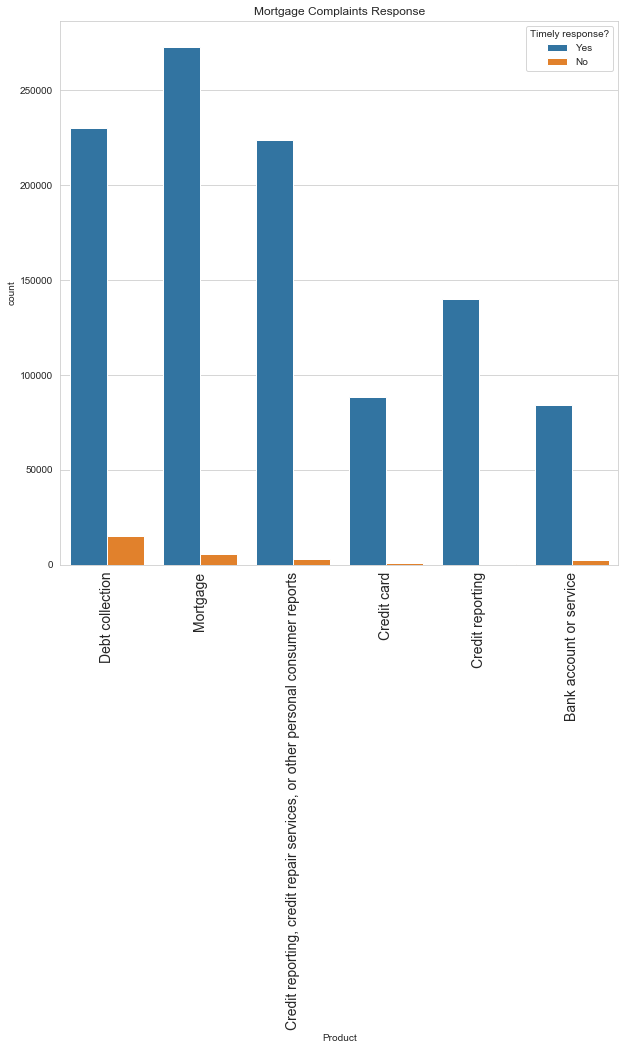

In [24]:
sn.set_style("whitegrid")
plt.figure(figsize=(10, 10))
plt.xticks(rotation=90)
plt.rc('xtick', labelsize=14)
plt.title('Mortgage Complaints Response')
sn.countplot(data=df[(df.Product == 'Mortgage') | (df.Product == 'Debt collection') |
                     (df.Product == 'Credit reporting') |
                     (df.Product == 'Credit reporting, credit repair services, or other personal consumer reports') |
                     (df.Product == 'Credit card') | (df.Product == 'Bank account or service')],
             x='Product', hue='Timely response?')

### Percentage of Untimely Reposnses

In [35]:
debt = 15246/(15246+229972) * 100
mortgage = 5528/(5528+272721)* 100
credit_services = 3194 / (3194+223587)* 100
credit_card = 982 / (982+88208)* 100
credit_reporting = 297 / (297+140135)* 100
bank_account = 2226 / (2226+83980)* 100
print(f'Debt Collection: {debt:.2f}%')
print(f'Bank Account: {bank_account:.2f}%')
print(f'Mortgage: {mortgage:.2f}%')
print(f'Credit Services: {credit_services:.2f}%')
print(f'Credit Card: {credit_card:.2f}%')
print(f'Credit Reporting: {credit_reporting:.2f}%')


Debt Collection: 6.22%
Bank Account: 2.58%
Mortgage: 1.99%
Credit Services: 1.41%
Credit Card: 1.10%
Credit Reporting: 0.21%


Though most of the complaints were against credit reporting/services products, the companies responded in a timely manner relative to companies responding to complaints about debt collection and bank accounts.

### Untimely Responses Over Time

In [47]:
def yes_response(row):
    if row['Timely response?'] == 'Yes':
        val = 1
    else:
        val = 0
    return val

In [50]:
def no_response(row):
    if row['Timely response?'] == 'No':
        val = 1
    else:
        val = 0
    return val

In [48]:
response_df = df[['Date received', 'Timely response?']]
response_df['Yes'] = response_df.apply(yes_response, axis=1)

In [51]:
response_df['No'] = response_df.apply(no_response, axis=1)

In [52]:
response_df.head()

,Date received,Timely response?,Yes,No
0,2019-05-14,Yes,1,0
1,2019-05-14,Yes,1,0
2,2019-05-14,Yes,1,0
3,2019-05-14,Yes,1,0
4,2019-05-14,Yes,1,0


In [55]:
df2 = response_df.resample('Y', on='Date received').sum()

In [58]:
df2['percent_untimely'] = df2['No']/ (df2['No']+df2['Yes'])

In [59]:
df2

,Yes,No,percent_untimely
Date received,,,
2011-12-31,2285,251,0.098975
2012-12-31,69865,2508,0.034654
2013-12-31,106948,1270,0.011736
2014-12-31,149410,3637,0.023764
2015-12-31,163652,4835,0.028697
2016-12-31,184797,6676,0.034867
2017-12-31,235954,7021,0.028896
2018-12-31,252729,4651,0.018071
2019-12-31,86347,1349,0.015383


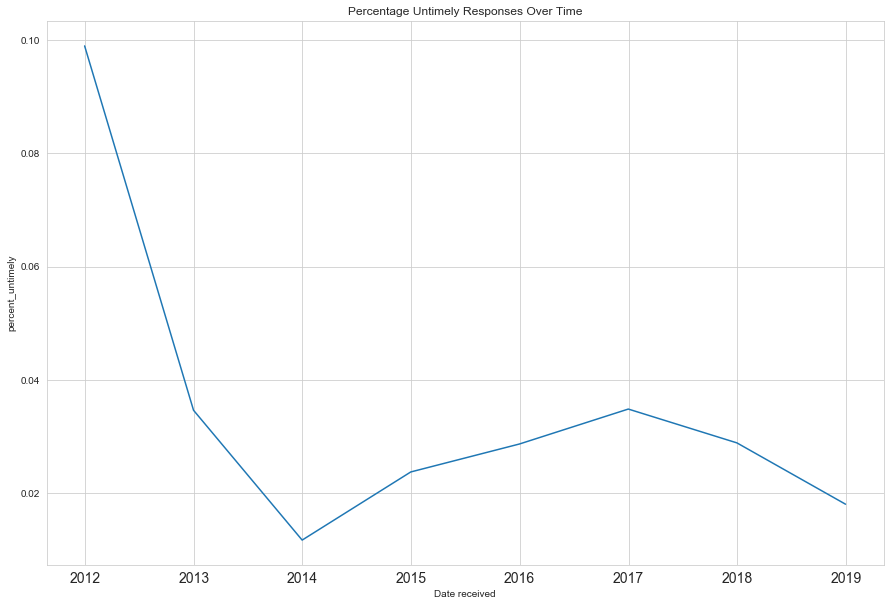

In [62]:
sn.set_style("whitegrid")
plt.figure(figsize=(15, 10))
plt.rc('xtick', labelsize=14)
plt.title('Percentage Untimely Responses Over Time')
sn.lineplot(df2.index[:-1], df2['percent_untimely'][:-1])

Based on CFPB's data,  untimely responses have started to decrease over all from 2017 for financial firms over all.

## Complaints by State

In [4]:
df_subproduct_count = df.groupby('State').count()['Complaint ID'].sort_values(ascending=False)
df_subproduct_count[:20]

State
CA    176223
FL    126724
TX    107760
NY     86267
GA     67219
IL     49668
NJ     47856
PA     44185
NC     39646
OH     38487
VA     37521
MD     36576
MI     30307
AZ     27336
WA     24402
MA     22810
TN     21049
CO     20497
SC     19138
MO     18116
Name: Complaint ID, dtype: int64

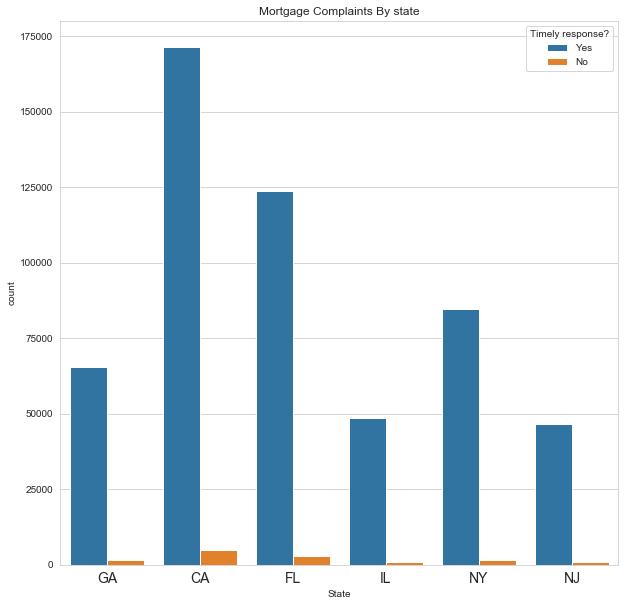

In [9]:
sn.set_style("whitegrid")
plt.figure(figsize=(10, 10))
plt.rc('xtick', labelsize=14)
plt.title('Mortgage Complaints By state')
sn.countplot(data=df[(df.State == 'CA') | (df.State == 'FL') |
                     (df.State == 'NY') |
                     (df.State == 'GA') |
                     (df.State == 'IL') | 
                     (df.State == 'NJ')],
             x='State', hue='Timely response?')

## Analyzing Text Complaints of Untimely responses

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
import spacy
from nltk.stem.porter import PorterStemmer
import re
porter_stemmer = PorterStemmer()

In [7]:
#Spacy tokenizer
spacy.load('en_core_web_sm')
lemmatizer = spacy.lang.en.English()

#Used for testing output of vectorizer
def wm2df(wm, feat_names):
    #create a dataframe from a word matrix
    # create an index for each row
    doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
    df = pd.DataFrame(data=wm.toarray(), index=doc_names,
                      columns=feat_names)
    return(df)

#Customizing Vectorizers
def my_tokenizer(doc):
    tokens = lemmatizer(doc)
    return([token.lemma_ for token in tokens])

def stemming_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()
    words = [porter_stemmer.stem(word) for word in words]
    return words

custom_vec = CountVectorizer(tokenizer=my_tokenizer,
                             ngram_range=(1,2),
                             stop_words='english')

In [35]:
my_tokenizer('hello I am running My name is justin')

['hello', 'I', 'be', 'run', 'My', 'name', 'be', 'justin']

In [31]:
df.head(1)

,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company,submitted_via,timely_response
41,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt is not mine,I keep getting calls on my cell phone from a s...,"GMA Investments, LLC",Web,False


In [5]:
#load in data that is going to be used in machine learning
df = pd.read_csv('C:\\Users\\jltsa\\Desktop\\Cust_complaints\\feature_sets\\ml_data1.csv')

In [27]:
df.head(1)

,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company,submitted_via,timely_response
0,Credit card,None,Billing statement,None,Year end summary provided by citi shows balanc...,"CITIBANK, N.A.",Web,True


In [14]:
#Get complaints which were not responded to in a timely manner
df = df[df['timely_response'] == False]

In [15]:
df.head(1)

,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company,submitted_via,timely_response
41,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt is not mine,I keep getting calls on my cell phone from a s...,"GMA Investments, LLC",Web,False


In [39]:
df['consumer_complaint_narrative'].loc[41]

'I keep getting calls on my cell phone from a summit receivables saying that I have a debt to be paid I call back the number that shows up a local number of but the place has no clue as to who I am The number they leave in the message is but when i call they want me to give a lot of information that if I had an actual debt with them they would have I ve asked for verification of the debt they say I have but none is forthcoming and they continue to harass me'

In [8]:
custom_vec.fit(df['consumer_complaint_narrative'][:30])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function my_tokenizer at 0x000001E90CB15A60>,
        vocabulary=None)

In [10]:
custom_vec.get_feature_names()[300:325]

['andor believe',
 'anger',
 'anger helplessness',
 'answer',
 'answer person',
 'answer tell',
 'answer work',
 'anticipate',
 'anticipate quick',
 'anymore',
 'anymore lose',
 'apologetic',
 'apologetic disgust',
 'appear',
 'appear credit',
 'appear late',
 'appear owe',
 'application',
 'application credit',
 'application online',
 'apply',
 'apply problem',
 'apply refinance',
 'appreciate',
 'appropriate']